# Visualization Project
An EDA on Google Play Store dataset acquired from <a href='https://www.kaggle.com/datasets/lava18/google-play-store-apps/data?select=googleplaystore_user_reviews.csv'>Kaggle.com</a>

TBC

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
## Importing Dataset
google_playstore = pd.read_csv('data/googleplaystore.csv')
user_reviews = pd.read_csv('data/googleplaystore_user_reviews.csv')

In [80]:
google_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [81]:
google_playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [119]:
google_playstore['Installs'].dropna(inplace=True)
google_playstore['Installs'].replace(r"[\+,\,\D*]", "", regex=True, inplace=True)
# google_playstore['Installs'].dropna(inplace=True)
# # google_playstore['Installs'] = pd.to_numeric(google_playstore['Installs'])
# google_playstore['Installs'] = google_playstore['Installs'].astype('int')
# google_playstore.info()
google_playstore['Installs'] = pd.to_numeric(google_playstore['Installs'])
google_playstore.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [121]:
top_100 = google_playstore.sort_values(by='Installs', ascending=False).head(100)
top_100

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3896,Subway Surfers,GAME,4.5,27711703,76M,1.000000e+09,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1.000000e+09,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1.000000e+09,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3565,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1.000000e+09,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,Gboard - the Google Keyboard,TOOLS,4.2,1859115,Varies with device,5.000000e+08,Free,0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
4566,SHAREit - Transfer & Share,TOOLS,4.6,7775146,17M,5.000000e+08,Free,0,Everyone,Tools,"July 30, 2018",4.5.28_ww,4.1 and up
1751,Candy Crush Saga,GAME,4.4,22428456,74M,5.000000e+08,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
4222,imo free video calls and chat,COMMUNICATION,4.3,4785892,11M,5.000000e+08,Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up


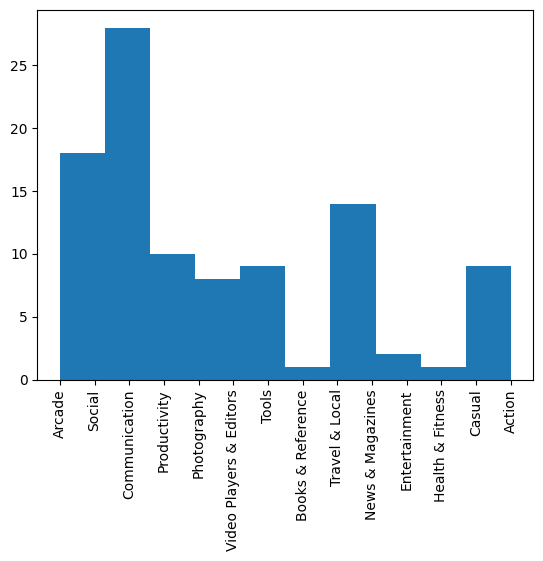

In [130]:
plt.hist(top_100['Genres'])
plt.xticks(rotation=90)
plt.show();

In [133]:
top_100

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3896,Subway Surfers,GAME,4.5,27711703,76M,1.000000e+09,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1.000000e+09,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1.000000e+09,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3565,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1.000000e+09,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,Gboard - the Google Keyboard,TOOLS,4.2,1859115,Varies with device,5.000000e+08,Free,0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
4566,SHAREit - Transfer & Share,TOOLS,4.6,7775146,17M,5.000000e+08,Free,0,Everyone,Tools,"July 30, 2018",4.5.28_ww,4.1 and up
1751,Candy Crush Saga,GAME,4.4,22428456,74M,5.000000e+08,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
4222,imo free video calls and chat,COMMUNICATION,4.3,4785892,11M,5.000000e+08,Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
